# Modeling - LendingClub Loan Listings Data

Meskerem Goshime

Data Source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans

“LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.” The company “enables borrowers to create unsecured personal loans between 1,000𝑎𝑛𝑑 40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.” (source: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?select=lc_2016_2017.csv)​

This study aims to help LendingClub in making informed lending decisions and investors make informed investment decisions

In [3]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
# converting y_train and y_test to numpy arrays
y_train = y_train['loan_status'].to_numpy()
y_test = y_test['loan_status'].to_numpy()

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(658404, 33) (658404,) (164601, 33) (164601,)


# Random Forest

In [ ]:
# Feature Importance

In [7]:
rf = RandomForestClassifier(n_estimators=800, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)  
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

[[152905     26]
 [ 11658     12]]


In [8]:
# Feature Importance

importance = rf.feature_importances_
columns = X_train.columns
importance = pd.DataFrame({'column': columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)
imp_features = importance.iloc[0:10, :]
imp_features = imp_features['column'].to_numpy()
imp_features

# Taking the top 11 important features
#imp_features = ['dti', 'annual_inc', 'loan_amnt', 'int_rate', 'open_acc', 'emp_length', 'sub_grade', 'inq_last_6mths', 'delinq_2yrs', 'grade']


array(['dti', 'annual_inc', 'loan_amnt', 'int_rate', 'open_acc',
       'emp_length', 'sub_grade', 'inq_last_6mths', 'delinq_2yrs',
       'grade'], dtype=object)

In [9]:
X_train = X_train[imp_features]
X_train.head(3)

,dti,annual_inc,loan_amnt,int_rate,open_acc,emp_length,sub_grade,inq_last_6mths,delinq_2yrs,grade
0,0.510503,-1.017129,-0.448528,-0.809332,-0.678105,-0.274961,-0.916225,0.304328,-0.365773,-0.606370
1,-1.390404,-0.730453,-1.113787,0.315054,-0.866226,1.089437,0.160463,0.304328,0.792882,0.154295
2,-0.494505,1.682406,1.796720,-0.289332,-1.054348,1.089437,-0.300975,-0.696905,-0.365773,-0.606370


In [10]:
X_test = X_test[imp_features]
X_test.head(3)

,dti,annual_inc,loan_amnt,int_rate,open_acc,emp_length,sub_grade,inq_last_6mths,delinq_2yrs,grade
0,-0.061709,-0.348218,0.608758,-0.129683,-0.866226,1.089437,-0.300975,0.304328,-0.365773,-0.606370
1,1.317903,-0.652381,0.014777,1.049440,0.074381,1.089437,1.237152,-0.696905,-0.365773,0.914959
2,-0.357513,-0.945460,-0.104019,0.394878,-0.866226,-0.274961,0.468088,-0.696905,-0.365773,0.154295


In [ ]:
# Hyperparameter Tuining

In [ ]:
# Tuning Random Forest Hyperparameters with GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[500, 1000]}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

gs = GridSearchCV(estimator=rf, param_grid = params, n_jobs=-1)

gs_rf = gs.fit(X_train, y_train)
y_pred = gs_rf.predict(X_test)

print(gs_rf.best_score_)
print(gs_rf.best_params_)


In [62]:
# Unfortunately, I was not able to run Grid Search, Random Search or cross validation 
# because of the size of the data and the amount of processing power it requires.
# Therefore, I had to manually run the Random Forest model with varying parameters.
# I am choosing 500 for the n_estimators value. The n_estimators value doesn't seem
# to make much difference in the performance of the model.

n = [50, 100, 300, 500, 800]
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)  
    y_pred_probs_rf = rf.predict_proba(X_test)[:,1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs_rf)
    print('n_estimators:', i, 'ROC/AUC Score:', roc_auc_score(y_test, y_pred_probs_rf))
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    print(cm_rf)

n_estimators: 50 ROC/AUC Score: 0.7226864861239766
[[152806    125]
 [ 11615     55]]
n_estimators: 100 ROC/AUC Score: 0.7342533737386716
[[152837     94]
 [ 11627     43]]
n_estimators: 300 ROC/AUC Score: 0.7415968210809456
[[152865     66]
 [ 11637     33]]
n_estimators: 500 ROC/AUC Score: 0.7427608609462055
[[152875     56]
 [ 11637     33]]
n_estimators: 800 ROC/AUC Score: 0.7438037342725318
[[152877     54]
 [ 11638     32]]


In [21]:
# Random Forest model with the chosen n_estimators value.

rf = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

# using the most important features made only a small difference.

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

[[152905     26]
 [ 11658     12]]
ROC/AUC Score:  0.7427608609462055


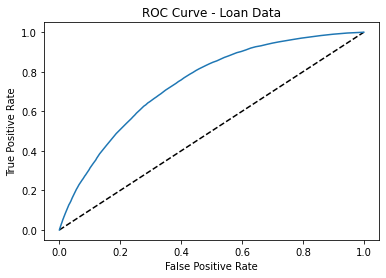

In [22]:
y_pred_rf = rf.predict(X_test)  
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

# ROC AUC Score

y_pred_probs_rf = rf.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
print('ROC/AUC Score: ', roc_auc_score(y_test, y_pred_probs_rf))

# ROC Curve
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs_rf)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Loan Data')
plt.show()



In [23]:
# Defining a function to find the optimal threshold value
def optimal_thr(tpr, fpr, thresholds):
    tpr_fpr_tres = pd.DataFrame({'tpr':tpr, 'fpr':fpr, 'thresholds':thresholds, 'tpr-fpr':tpr-fpr})
    tpr_fpr_tres = tpr_fpr_tres.sort_values(by='tpr-fpr', ascending=False)
    return tpr_fpr_tres

optimal_thr(tpr_rf, fpr_rf, thresholds_rf)

# Optimal threshold value seems to be 0.062

,tpr,fpr,thresholds,tpr-fpr
255,0.769237,0.409211,0.062,0.360027
256,0.777978,0.418300,0.060,0.359678
253,0.750643,0.391104,0.066,0.359538
257,0.787746,0.428435,0.058,0.359311
254,0.759212,0.400403,0.064,0.358809
...,...,...,...,...
2,0.000171,0.000000,0.690,0.000171
3,0.000171,0.000020,0.634,0.000152
1,0.000086,0.000000,0.702,0.000086
0,0.000000,0.000000,1.702,0.000000


In [25]:
pred_new = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_probs_rf, 'y_pred': y_pred_rf})
bad_loans = pred_new[pred_new['y_pred_proba']>=0.062]
bad_loans['class_new']=1
good_loans = pred_new[pred_new['y_pred_proba']<0.062]
good_loans['class_new']=0
good_loans.reset_index(drop=True, inplace=True)
bad_loans.reset_index(drop=True, inplace=True)
pred_new = pd.concat([good_loans, bad_loans], axis=0)
print(pred_new['class_new'].value_counts())
print(pred_new.head())

0    93043
1    71558
Name: class_new, dtype: int64
   y_test  y_pred_proba  y_pred  class_new
0       0         0.002       0          0
1       0         0.036       0          0
2       0         0.024       0          0
3       0         0.008       0          0
4       0         0.036       0          0


C:\Users\meske\AppData\Local\Temp/ipykernel_7756/799756595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_loans['class_new']=1
C:\Users\meske\AppData\Local\Temp/ipykernel_7756/799756595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_loans['class_new']=0


In [26]:
# Evaluating the confusion metrix with the new threshold value

cm_rf = confusion_matrix(pred_new['y_test'], pred_new['class_new'])
print(cm_rf)

# We are now catching a lot more of the bad loans. 
# We are still missing 3248 bad loans, as predicting them as good loans.
# With the default 0.5 threshold value, we were missing 11637 bad loans. 
# As a tradeoff, we are now misclassifing a lot more of the good loans as bad loans (59713).

[[90350 62581]
 [ 2693  8977]]


In [27]:
# Evaluating the classification report for the new threshold value

cl_report = classification_report(pred_new['y_test'], pred_new['class_new'])
print(cl_report)

              precision    recall  f1-score   support

           0       0.97      0.59      0.73    152931
           1       0.13      0.77      0.22     11670

    accuracy                           0.60    164601
   macro avg       0.55      0.68      0.48    164601
weighted avg       0.91      0.60      0.70    164601



# Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_probs_lr = lr.predict_proba(X_test)[:,1]


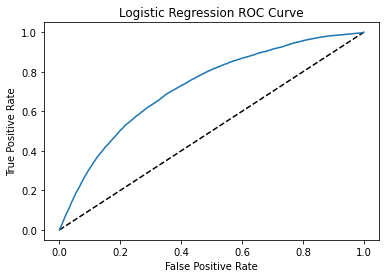

In [70]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_probs_lr)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [71]:
# ROC/AUC Score

print(roc_auc_score(y_test, y_pred_probs_lr))

# The ROC/AUC Score is a little bit less than that of the RandomForest Model

0.7233749672221697


In [62]:
# Finding the optimal threshold value

optimal_thr(tpr_lr, fpr_lr, thresholds_lr)

# The optimal threshold is 0.066120

,tpr,fpr,thresholds,tpr-fpr
13764,0.692374,0.356664,0.066120,0.335709
13762,0.692288,0.356658,0.066122,0.335630
13763,0.692288,0.356664,0.066122,0.335624
13760,0.692117,0.356586,0.066128,0.335531
13758,0.691945,0.356461,0.066146,0.335484
...,...,...,...,...
20615,0.999400,0.999699,0.004352,-0.000299
20612,0.999314,0.999614,0.004703,-0.000300
20619,0.999572,0.999876,0.003292,-0.000304
20613,0.999314,0.999627,0.004670,-0.000313


In [63]:
# Making predictions using the optimal threshold value (using Prediction_optimal function defined a while back).
pred_new_lr = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_probs_lr, 'y_pred': y_pred_lr})
bad_loans = pred_new[pred_new['y_pred_proba']>=0.066120]
bad_loans['class_new']=1
good_loans = pred_new[pred_new['y_pred_proba']<0.066120]
good_loans['class_new']=0
good_loans.reset_index(drop=True, inplace=True)
bad_loans.reset_index(drop=True, inplace=True)
pred_new_lr = pd.concat([good_loans, bad_loans], axis=0)
print(pred_new_lr['class_new'].value_counts())

#prediction_optimal(y_test, y_pred_probs_lr, y_pred_lr, 0.066120)
print(pred_new_lr.head())
print(pred_new_lr['class_new'].value_counts())

0    97446
1    67155
Name: class_new, dtype: int64
   y_test  y_pred_proba  y_pred  class_new
0       0         0.002       0          0
1       0         0.036       0          0
2       0         0.024       0          0
3       0         0.008       0          0
4       0         0.036       0          0
0    97446
1    67155
Name: class_new, dtype: int64


C:\Users\meske\AppData\Local\Temp/ipykernel_12152/1869500244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_loans['class_new']=1
C:\Users\meske\AppData\Local\Temp/ipykernel_12152/1869500244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_loans['class_new']=0


In [65]:
cm_lr = confusion_matrix(pred_new_lr['y_test'], pred_new_lr['class_new'])
cm_lr

# When using the optimal threshold value, the true positive and true negative 
# values are higher in the logistic regression model when compared to the Random Forest model.

array([[94423, 58508],
       [ 3023,  8647]], dtype=int64)

When using the optimal threshold value, the true positive and true negative 
values are higher in the logistic regression model when compared to the Random Forest model. 
However, the Random Forest Model misses only 2693 bad loans, while the logistic regression misses 3023.

This was the confusion matrix for the Random Forest Model.

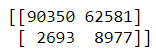

# Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
#Searching for the best paramaters.
# Unfortunately, I was not able to run Grid Search, Random Search or cross validation 
# because of the size of the data and the amount of processing power it requires.
# Therefore, I had to manually run the Gradient Boosting model with varying 
# n_estimator and max_depth values.

n = [50, 100, 200, 400, 600]
for i in n:
    gb = GradientBoostingClassifier(
    n_estimators=i,
    learning_rate=0.1,
    max_depth=3)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    y_pred_probs_gb = gb.predict_proba(X_test)[:,1]
    fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_probs_gb)
    print('n_estimators:', i, 'ROC/AUC Score:', roc_auc_score(y_test, y_pred_probs_gb))

n_estimators: 50 ROC/AUC Score: 0.7367474206952447
n_estimators: 100 ROC/AUC Score: 0.7467116757355896
n_estimators: 200 ROC/AUC Score: 0.757402074125683
n_estimators: 400 ROC/AUC Score: 0.7638670215466505
n_estimators: 600 ROC/AUC Score: 0.7668860388040538


In [49]:
# The performance of the model seems to increase with increasing n_estimators value.
# However, going beyond 600 for n_estimators will make the processing time very long. 

# Reducing the max_depth to 1 and increasing n_estimators to 800.

gb = GradientBoostingClassifier(
    n_estimators=800,
    learning_rate=0.1,
    max_depth=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_probs_gb = gb.predict_proba(X_test)[:,1]

In [54]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_probs_gb)
print('n_estimators:', 800, 'ROC/AUC Score:', roc_auc_score(y_test, y_pred_probs_gb))

n_estimators: 800 ROC/AUC Score: 0.7284909506349334


In [ ]:
# In the end, I am choosing 600 for n_estimators and 3 for max_depth.

In [56]:
# Running Gradient Boosting Classifier with chosen parameters.

gb = GradientBoostingClassifier(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=3)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_probs_gb = gb.predict_proba(X_test)[:,1]

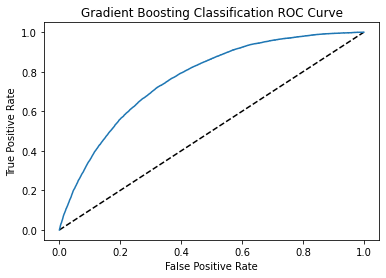

0.7668261420627009


In [57]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_probs_gb)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gb, tpr_gb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classification ROC Curve')
plt.show()

# ROC/AUC Score

print(roc_auc_score(y_test, y_pred_probs_gb))

# The ROC/AUC Score is a little bit less than that of the RandomForest Model

In [58]:
# Finding the optimal threshold value

optimal_thr(tpr_gb, fpr_gb, thresholds_gb)

# The optimal threshold is 0.073607

,tpr,fpr,thresholds,tpr-fpr
14171,0.723736,0.323937,0.073607,0.399799
14097,0.720394,0.320674,0.074145,0.399720
14103,0.720823,0.321112,0.074073,0.399710
14165,0.723393,0.323702,0.073642,0.399692
14169,0.723565,0.323878,0.073616,0.399687
...,...,...,...,...
2,0.000171,0.000000,0.843965,0.000171
3,0.000171,0.000033,0.778123,0.000139
1,0.000086,0.000000,0.944293,0.000086
0,0.000000,0.000000,1.944293,0.000000


In [59]:
# Making predictions using the optimal threshold value (using Prediction_optimal function defined a while back).
pred_new_gb = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_probs_gb, 'y_pred': y_pred_gb})
bad_loans = pred_new_gb[pred_new_gb['y_pred_proba']>=0.073607]
bad_loans['class_new']=1
good_loans = pred_new_gb[pred_new_gb['y_pred_proba']<0.073607]
good_loans['class_new']=0
good_loans.reset_index(drop=True, inplace=True)
bad_loans.reset_index(drop=True, inplace=True)
pred_new_gb = pd.concat([good_loans, bad_loans], axis=0)
print(pred_new_gb['class_new'].value_counts())
print(pred_new_gb.head())

0    106615
1     57986
Name: class_new, dtype: int64
   y_test  y_pred_proba  y_pred  class_new
0       0      0.069084       0          0
1       0      0.050554       0          0
2       0      0.020303       0          0
3       0      0.026304       0          0
4       0      0.026025       0          0


C:\Users\meske\AppData\Local\Temp/ipykernel_7756/2309046938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_loans['class_new']=1
C:\Users\meske\AppData\Local\Temp/ipykernel_7756/2309046938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_loans['class_new']=0


In [60]:
# Gradient Boosting Classification Confusion Matrix

cm_gb = confusion_matrix(pred_new_gb['y_test'], pred_new_gb['class_new'])
print('Gradient Boosting Classification Confusion Matrix')
print(cm_gb)

Gradient Boosting Classification Confusion Matrix
[[103391  49540]
 [  3224   8446]]


For Comparison:

Gradient Boosting ROC/AUC Score: 

Random Forest ROC/AUC Score: 

Logistic Regression ROC/AUC Score: 


# Choosing the optimal model

The Logistic Regression model performs the best.